<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
    <i>Aprender una técnica no es un fin en si mismo, simplemente indica por donde hay que empezar</i><br><b>Proverbio Japonés</b></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
<i>Material curado y organizado por el Prof. Dr. Hernán D. Merlino</i><br> 
<i>AutoML Clasification 1.0 - 2024 Q3</i></p> 
<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>AutoML Clasificación</strong></p> 

In [1]:
from pycaret.datasets import get_data

<a id = "1.0"></a>
<p style="font-size:17px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong><u>Dataset Description</u></strong>:
<ul style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<li><i>ID: ID of each client</i></li>
<li><i>LIMIT_BAL: Amount of given credit in NT dollars</i></li>
<li><i>SEX: Gender (1=male, 2=female)</i></li>
<li><i>EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)</i></li>
<li><i>MARRIAGE: Marital status (1=married, 2=single, 3=others)</i></li>
<li><i>AGE: Age in years</i></li>
<li><i>PAY_0 to PAY_6: Repayment status by n months ago (PAY_0 = last month ... PAY_6 = 6 months ago) (Labels: -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)</i></li>
<li><i>BILL_AMT1 to BILL_AMT6: Amount of bill statement by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)</i></li>  
<li><i>PAY_AMT1 to PAY_AMT6: Amount of payment by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
* **default**: Default payment (1=yes, 0=no) Target Column</i></li>  
</ul></p>

In [2]:
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
dataset.shape

(24000, 24)

In [4]:
data_train = dataset.sample(frac=0.95, random_state=786)
data_test = dataset.drop(data_train.index)

data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

print('Data for Modeling          : ' + str(data_train.shape))
print('Unseen Data For Predictions: ' + str(data_test.shape))

Data for Modeling          : (22800, 24)
Unseen Data For Predictions: (1200, 24)


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

In [5]:
from pycaret.classification import *

In [7]:
exp_clf101 = setup(data = data_train, target = 'default', session_id=10001)

,Description,Value
0,Session id,10001
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 24)"
5,Transformed train set shape,"(15959, 24)"
6,Transformed test set shape,"(6841, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong><u>Pycaret classification Models:</u></strong><br>
</p>

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8197,0.7734,0.3550,0.6767,0.4653,0.3694,0.3974,2.1150
lightgbm,Light Gradient Boosting Machine,0.8192,0.7676,0.3606,0.6702,0.4684,0.3711,0.3973,0.5990
ada,Ada Boost Classifier,0.8185,0.7668,0.3448,0.6769,0.4562,0.3610,0.3909,0.4880
rf,Random Forest Classifier,0.8148,0.7554,0.3586,0.6478,0.4611,0.3604,0.3836,1.2750
lda,Linear Discriminant Analysis,0.8116,0.7143,0.2584,0.7026,0.3770,0.2932,0.3446,0.0330
xgboost,Extreme Gradient Boosting,0.8091,0.7494,0.3493,0.6221,0.4469,0.3425,0.3636,1.7420
et,Extra Trees Classifier,0.8087,0.7477,0.3530,0.6187,0.4491,0.3437,0.3638,0.6080
lr,Logistic Regression,0.8011,0.7011,0.1969,0.6763,0.2973,0.2235,0.2812,1.1140
ridge,Ridge Classifier,0.7972,0.7143,0.1365,0.7213,0.2289,0.1707,0.2511,0.0190
dummy,Dummy Classifier,0.7788,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong><u>Métricas:</u></strong><br></p>  
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<a href="https://towardsdatascience.com/the-ultimate-guide-of-classification-metrics-for-model-evaluation-83e4cdf294d9" target=\"_blank\">The ultimate guide to binary classification metrics</a><br>
<a href="https://neptune.ai/blog/evaluation-metrics-binary-classification" target=\"_blank\">24 Evaluation Metrics for Binary Classification</a><br>
<a href="https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/" target=\"_blank\">Precision, Recall, F1, Accuracy en clasificación</a><br>
<a href="https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc" target=\"_blank\">F1 Score vs ROC AUC vs Accuracy vs PR AUC</a><br>
<a href="https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7" target=\"_blank\">The advantages of the Matthews correlation coefficient (MCC) over F1 score and accuracy in binary classification evaluation</a>
</p>  

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

In [10]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=10001, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Decision Tree Classifier

In [11]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7080,0.6003,0.4079,0.3591,0.3820,0.1918,0.1925
1,0.7043,0.5972,0.4051,0.3531,0.3773,0.1846,0.1853
2,0.7212,0.6037,0.3938,0.3757,0.3845,0.2044,0.2045
3,0.7168,0.6033,0.3966,0.3694,0.3825,0.1991,0.1993
4,0.7162,0.5964,0.3824,0.3649,0.3734,0.1901,0.1902
5,0.7162,0.6087,0.4136,0.3724,0.3919,0.2075,0.2080
6,0.7513,0.6446,0.4533,0.4396,0.4463,0.2859,0.2860
7,0.7412,0.6391,0.4561,0.4215,0.4381,0.2703,0.2707
8,0.7249,0.6104,0.4051,0.3844,0.3945,0.2167,0.2168


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=10001, splitter='best')


### Random Forest Classifier

In [13]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8089,0.7467,0.3598,0.6165,0.4544,0.3481,0.3667
1,0.8127,0.7625,0.3683,0.6311,0.4651,0.3609,0.3802
2,0.8170,0.7638,0.3541,0.6614,0.4613,0.3630,0.3887
3,0.8089,0.7766,0.3569,0.6176,0.4524,0.3466,0.3657
4,0.8258,0.7537,0.3768,0.6963,0.4890,0.3950,0.4221
5,0.8152,0.7357,0.3201,0.6726,0.4338,0.3396,0.3731
6,0.8214,0.7762,0.4051,0.6560,0.5009,0.3995,0.4167
7,0.8114,0.7551,0.3626,0.6275,0.4596,0.3551,0.3747
8,0.8133,0.7508,0.3399,0.6486,0.4461,0.3467,0.3729


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=10001, verbose=0,
                       warm_start=False)


### Tune a Model

In [15]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8239,0.6507,0.3399,0.7143,0.4607,0.3709,0.4075
1,0.8252,0.6505,0.3371,0.7256,0.4603,0.3723,0.4113
2,0.8183,0.6349,0.3059,0.7059,0.4269,0.3384,0.3803
3,0.8195,0.6468,0.3371,0.6879,0.4525,0.3592,0.3921
4,0.8221,0.6454,0.3286,0.7117,0.4496,0.3602,0.3986
5,0.8252,0.6474,0.3286,0.7342,0.4540,0.3675,0.4097
6,0.8246,0.6612,0.3683,0.6952,0.4815,0.3877,0.4161
7,0.8177,0.6426,0.3286,0.6824,0.4436,0.3502,0.3837
8,0.8158,0.6322,0.3031,0.6903,0.4213,0.3310,0.3707


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [16]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=10001, splitter='best')


In [17]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.02, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=10001, splitter='best')


_________________

In [18]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8202,0.7682,0.3513,0.6813,0.4636,0.3685,0.3978
1,0.8233,0.7769,0.3428,0.7076,0.4618,0.3710,0.4060
2,0.8202,0.7641,0.3258,0.7012,0.4449,0.3543,0.3914
3,0.8202,0.7908,0.3541,0.6793,0.4655,0.3701,0.3985
4,0.8252,0.7658,0.3513,0.7126,0.4706,0.3800,0.4142
5,0.8239,0.7521,0.3286,0.7250,0.4522,0.3646,0.4052
6,0.8233,0.7960,0.3881,0.6749,0.4928,0.3951,0.4173
7,0.8189,0.7796,0.3484,0.6758,0.4598,0.3641,0.3930
8,0.8183,0.7669,0.3286,0.6864,0.4444,0.3516,0.3857


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=10001, verbose=0,
                       warm_start=False)


In [20]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_samples_leaf=3,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=240, n_jobs=-1,
                       oob_score=False, random_state=10001, verbose=0,
                       warm_start=False)


### Plot a Model

#### AUC Plot

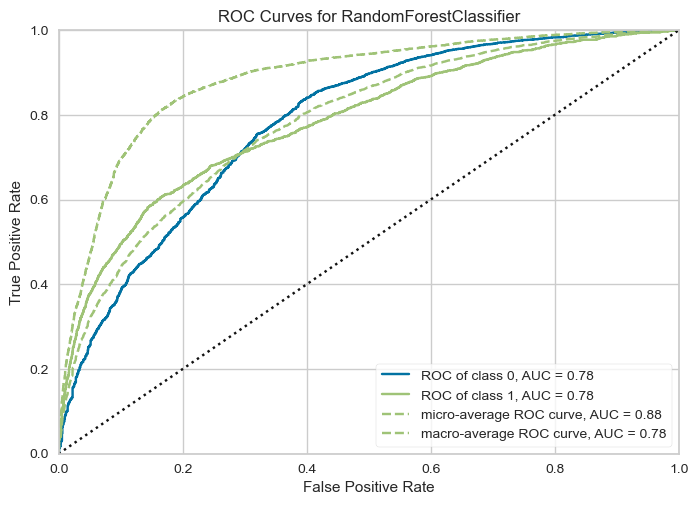

In [21]:
plot_model(tuned_rf, plot = 'auc')

#### Precision-Recall Curve

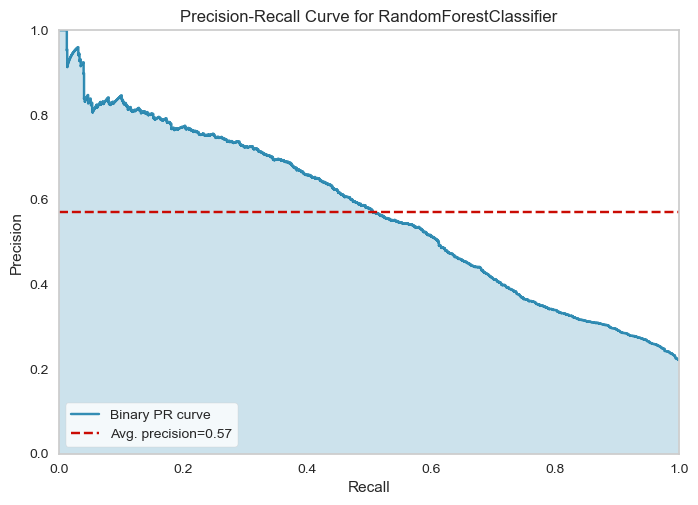

In [22]:
plot_model(tuned_rf, plot = 'pr')

#### Feature Importance Plot

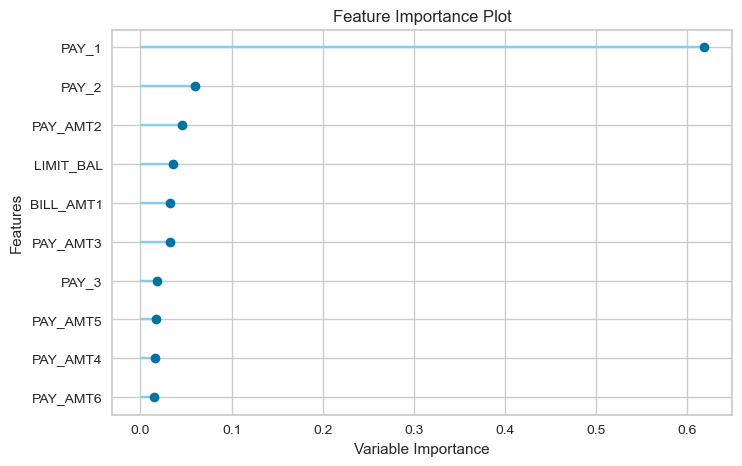

In [23]:
plot_model(tuned_rf, plot='feature')

#### Confusion Matrix

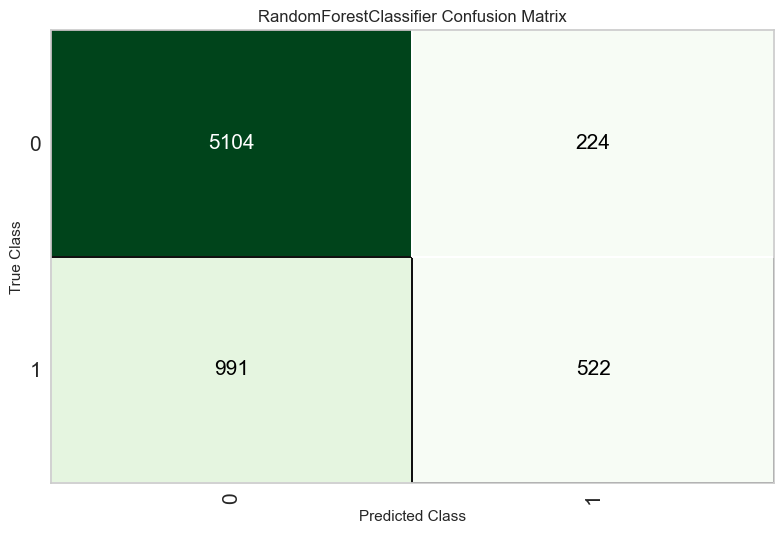

In [24]:
plot_model(tuned_rf, plot = 'confusion_matrix')

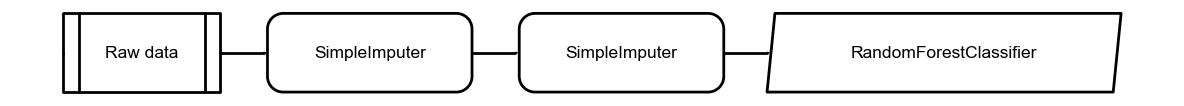

In [25]:
evaluate_model(tuned_rf)

### Predict on test

In [26]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8224,0.7838,0.3450,0.6997,0.4622,0.3701,0.4034


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
18461,500000,1,1,1,41,0,0,2,2,-1,...,529.0,2608.0,0.0,0.0,800.0,0.0,1500.0,0,0,0.7738
17928,160000,2,3,1,41,-1,-1,-1,-1,-1,...,2606.0,316.0,416.0,416.0,416.0,2606.0,316.0,0,0,0.8187
7913,150000,1,2,3,25,-1,-1,-1,0,0,...,0.0,7705.0,9047.0,8.0,33.0,0.0,0.0,1,0,0.8584
8978,130000,1,3,2,27,1,2,0,0,0,...,132202.0,6000.0,6000.0,5000.0,5000.0,5000.0,5200.0,0,0,0.6918
16419,150000,1,1,2,27,0,0,0,0,0,...,65590.0,3100.0,3500.0,3000.0,5000.0,3000.0,2500.0,0,0,0.9167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,80000,2,2,2,33,-1,-1,-2,-1,0,...,0.0,0.0,0.0,2000.0,0.0,0.0,193.0,0,0,0.8245
6479,150000,1,3,2,32,0,0,0,0,0,...,29818.0,5039.0,4030.0,1500.0,706.0,1000.0,0.0,0,0,0.8919
16363,200000,1,1,2,38,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7745
4258,50000,2,2,2,39,0,0,0,0,0,...,17175.0,1620.0,1267.0,634.0,665.0,668.0,1000.0,0,0,0.8142


### Finalize Model

In [27]:
final_rf = finalize_model(tuned_rf)

In [28]:
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'],
                                    transform...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
             

In [29]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8297,0.8061,0.3701,0.7254,0.4902,0.4006,0.4333


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
18461,500000,1,1,1,41,0,0,2,2,-1,...,529.0,2608.0,0.0,0.0,800.0,0.0,1500.0,0,0,0.8117
17928,160000,2,3,1,41,-1,-1,-1,-1,-1,...,2606.0,316.0,416.0,416.0,416.0,2606.0,316.0,0,0,0.8046
7913,150000,1,2,3,25,-1,-1,-1,0,0,...,0.0,7705.0,9047.0,8.0,33.0,0.0,0.0,1,0,0.8360
8978,130000,1,3,2,27,1,2,0,0,0,...,132202.0,6000.0,6000.0,5000.0,5000.0,5000.0,5200.0,0,0,0.6519
16419,150000,1,1,2,27,0,0,0,0,0,...,65590.0,3100.0,3500.0,3000.0,5000.0,3000.0,2500.0,0,0,0.9209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,80000,2,2,2,33,-1,-1,-2,-1,0,...,0.0,0.0,0.0,2000.0,0.0,0.0,193.0,0,0,0.8386
6479,150000,1,3,2,32,0,0,0,0,0,...,29818.0,5039.0,4030.0,1500.0,706.0,1000.0,0.0,0,0,0.9079
16363,200000,1,1,2,38,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7572
4258,50000,2,2,2,39,0,0,0,0,0,...,17175.0,1620.0,1267.0,634.0,665.0,668.0,1000.0,0,0,0.8188


In [31]:
unseen_predictions = predict_model(final_rf, data=data_test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8175,0.7849,0.3612,0.6507,0.4645,0.3652,0.3882


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8226
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9276
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8251
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7764
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.7455


### Saving/Loading Model

In [32]:
save_model(final_rf,'./model/FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5',
                                              'PAY_AMT6'],
                                     transform...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy'

______________________________

In [33]:
from pycaret.classification import *

In [34]:
saved_final_rf = load_model('./model/FinalModel')

Transformation Pipeline and Model Successfully Loaded


In [35]:
new_prediction = predict_model(saved_final_rf, data=data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8175,0.7849,0.3612,0.6507,0.4645,0.3652,0.3882


In [37]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8226
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9276
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8251
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7764
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.7455


__________________________

________________________